# Depression prediction using heart rate variability 

In [1]:
# importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Readig Data from .csv file
data = pd.read_csv("Qmerge1-FirstLastHRV.csv") 
data.head()

nsrrid  gender_x  race_x  age_s1_x  ang_date  chd_dthdt  chf_date  \
0  200079         2       3        56       NaN        NaN       NaN   
1  200079         2       3        56       NaN        NaN       NaN   
2  200082         1       1        40       NaN        NaN       NaN   
3  200082         1       1        40       NaN        NaN       NaN   
4  200108         2       1        60       NaN        NaN       NaN   

   cvd_dthdt  mi_date  stk_date  ...        ihr     NN_RR      AVNN      SDNN  \
0        NaN      NaN       NaN  ...  75.112951  0.992000   798.797   46.2118   
1        NaN      NaN       NaN  ...  70.633025  0.968839   849.461   72.6343   
2        NaN      NaN       NaN  ...  59.355400  0.996610  1010.860   39.4332   
3        NaN      NaN       NaN  ...  56.666320  0.996466  1058.830  146.8230   
4        NaN      NaN       NaN  ...  64.954397  0.990741   923.725   27.7213   

          VLF        LF      LF_n         HF      HF_n     LF_HF  
0    695.6390   285.530  0.256639   827.0460  0.743361  0.345241  
1   1234.8283  1666.850  0.507907  1614.9500  0.492093  1.032140  
2    739.2121   531.024  0.686206   242.8310  0.313794  2.186800  
3  13231.3000  3964.450  0.378345  6513.9400  0.621655  0.608610  
4    532.0790   168.406  0.672796    81.9015  0.327204  2.056200  

[5 rows x 45 columns]

## Column Names description
1. nsrrid = This subject identifier was created by the National Sleep Research Resource (NSRR) team to more easily match with file downloads. Use 'pptid' to link with Biologic Specimen and Data Repository Information Coordinating Center (BioLINCC) and cohort-specific data.

2. BLUE25 = Quality of Life (QOL) (Sleep Heart Health Study Visit One (SHHS1)): Felt downhearted and blue. 
        1: All of the time
        2: Most of the time
        3: A good bit of the time
        4: Some of the time
        5: A little of time
        6: None of the time

3. ihr = Instantaneous heart rate

4. NN_RR = Ratio of consecutive normal sinus beats (NN) over all cardiac inter-beat (RR) intervals

5. AVNN = Mean of all normal sinus to normal sinus interbeat intervals (NN) 

6. SDNN = Standard deviation of all normal sinus to normal sinus interbeat (NN) intervals

7. VLF = Very low frequency power: the normal sinus to normal sinus interbeat (NN) interval spectral power between 0.003 and 0.04 Hz

8. LF = Low frequency power: the normal sinus to normal sinus interbeat (NN) interval spectral power between 0.04 and 0.15 Hz

9. HF = High frequency power: the normal sinus to normal sinus interbeat (NN) interval spectral power between 0.15 and 0.4 Hz

10. HF_n = High frequency power (normalized)

11. LF_HF = The ratio of low to high frequency power

In [3]:
# Copying dataframe
heart_rate_data = data.copy()

### Data cleaning

In [4]:
# Select useful columns from dataframe
heart_rate_data = heart_rate_data[['nsrrid', 'gender_x', 'race_x', 'age_s1_x', 'BLUE25', 'ihr', 'NN_RR', 'AVNN', 'SDNN', 'VLF', 'LF', 'HF', 'HF_n', 'LF_HF']]
heart_rate_data.head()

nsrrid  gender_x  race_x  age_s1_x  BLUE25        ihr     NN_RR      AVNN  \
0  200079         2       3        56     5.0  75.112951  0.992000   798.797   
1  200079         2       3        56     5.0  70.633025  0.968839   849.461   
2  200082         1       1        40     6.0  59.355400  0.996610  1010.860   
3  200082         1       1        40     6.0  56.666320  0.996466  1058.830   
4  200108         2       1        60     5.0  64.954397  0.990741   923.725   

       SDNN         VLF        LF         HF      HF_n     LF_HF  
0   46.2118    695.6390   285.530   827.0460  0.743361  0.345241  
1   72.6343   1234.8283  1666.850  1614.9500  0.492093  1.032140  
2   39.4332    739.2121   531.024   242.8310  0.313794  2.186800  
3  146.8230  13231.3000  3964.450  6513.9400  0.621655  0.608610  
4   27.7213    532.0790   168.406    81.9015  0.327204  2.056200

In [5]:
# Number of rows in Dataframe
heart_rate_data.shape[0]

972

In [6]:
# Skipping every other row, to reemove duplicate rows
heart_rate_data = heart_rate_data[::2]

# Number of rows in Dataframe
heart_rate_data.shape[0]

486

In [7]:
# Renaming columns 
heart_rate_data = heart_rate_data.rename(index=str, columns={'gender_x': 'Gender', 'race_x': 'Race', 'age_s1_x': 'Age'})
heart_rate_data = heart_rate_data[heart_rate_data['BLUE25'] != 'NAN']
heart_rate_data.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


nsrrid  Gender  Race  Age  BLUE25        ihr     NN_RR      AVNN      SDNN  \
0  200079       2     3   56     5.0  75.112951  0.992000   798.797  46.21180   
2  200082       1     1   40     6.0  59.355400  0.996610  1010.860  39.43320   
4  200108       2     1   60     5.0  64.954397  0.990741   923.725  27.72130   
6  200109       2     1   71     6.0  76.865428  0.997389   780.585   8.41453   
8  200112       1     1   48     5.0  62.348286  0.996785   962.336  88.53440   

         VLF          LF         HF      HF_n      LF_HF  
0   695.6390   285.53000  827.04600  0.743361   0.345241  
2   739.2121   531.02400  242.83100  0.313794   2.186800  
4   532.0790   168.40600   81.90150  0.327204   2.056200  
6    55.3561     8.87934    4.38036  0.330351   2.027080  
8  3987.3524  3269.69000  292.34900  0.082073  11.184200

In [8]:
# Dropping row that has any empty field
dep_data = heart_rate_data.dropna(axis=0, how='any')
dep_data.shape[0]


449

### Creating dummy variables for Depression score

In [9]:
# Creating dummy variables for Depression score, Score 1 to 3 replace with 0
# Depression score 4 to 6 replace with 1
dep_data.loc[dep_data['BLUE25'] < 4, 'BLUE25'] = 0
dep_data.loc[dep_data['BLUE25'] >= 4, 'BLUE25'] = 1
dep_data.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


nsrrid  Gender  Race  Age  BLUE25        ihr     NN_RR      AVNN      SDNN  \
0  200079       2     3   56     1.0  75.112951  0.992000   798.797  46.21180   
2  200082       1     1   40     1.0  59.355400  0.996610  1010.860  39.43320   
4  200108       2     1   60     1.0  64.954397  0.990741   923.725  27.72130   
6  200109       2     1   71     1.0  76.865428  0.997389   780.585   8.41453   
8  200112       1     1   48     1.0  62.348286  0.996785   962.336  88.53440   

         VLF          LF         HF      HF_n      LF_HF  
0   695.6390   285.53000  827.04600  0.743361   0.345241  
2   739.2121   531.02400  242.83100  0.313794   2.186800  
4   532.0790   168.40600   81.90150  0.327204   2.056200  
6    55.3561     8.87934    4.38036  0.330351   2.027080  
8  3987.3524  3269.69000  292.34900  0.082073  11.184200

In [10]:
# Coonverting columns to 2 dimensional array
heart_data = dep_data[['BLUE25', 'ihr', 'NN_RR', 'AVNN', 'SDNN', 'VLF', 'LF', 'HF', 'HF_n', 'LF_HF']]

### Selecting dataset for machine learing

In [11]:
# Data for machine learning algorithm, X = all the columns in heart_data
# dataframe except BLUE25, and y = BLUE25
X = heart_data.drop('BLUE25', axis = 1)
y = heart_data['BLUE25']

In [12]:
### Choosing model

In [13]:
# Choosing logistic regression as we have only 2 output values, 
# 0 = Depressed, 1 = Not Depressed, or possibility of less depression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### Splitting data for train, test

In [14]:
# Splitting data traing and testing model, by default 75% data for training, and 25% for testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Fitting data to model

In [15]:
# Fitting training data to model
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
# Printing accuracy of model for training and testing data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
X_test.head()

Training Data Score: 0.9821428571428571
Testing Data Score: 0.9557522123893806


ihr     NN_RR     AVNN     SDNN         VLF       LF        HF  \
652  64.508291  0.996894  930.113  49.6384  1092.66050  692.828  780.8260   
624  69.625196  0.997118  861.757  30.3586   341.33360  409.583  165.0230   
378  66.864660  0.997006  897.335  31.9392   577.38100  330.938  118.2970   
62   73.294886  0.997268  818.611  30.2603   448.75243  292.491  172.6830   
466  70.593384  0.997159  849.938  20.2343   185.56210  118.909   88.7831   

         HF_n     LF_HF  
652  0.529857  0.887301  
624  0.287193  2.481980  
378  0.263330  2.797520  
62   0.371222  1.693800  
466  0.427475  1.339320

### Model predictions

In [17]:
# Model Predictions for testing dataset
predictions = classifier.predict(X_test)

In [18]:
# Using new data to predict
new_data = [00.508291, 0.996894, 930.113, 49.6384, 1092.66050, 692.828, 780.8260, 0.529857, 0.887301]
predictions = classifier.predict([new_data])
predictions

array([1.])

# Logistic Regression continued

In [24]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.108546
         Iterations 10
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.057   
Dependent Variable: BLUE25           AIC:              115.4746
Date:               2019-05-09 21:00 BIC:              152.4378
No. Observations:   449              Log-Likelihood:   -48.737 
Df Model:           8                LL-Null:          -51.665 
Df Residuals:       440              LLR p-value:      0.66352 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     10.0000                                    
----------------------------------------------------------------
           Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------
ihr         0.2144    0.2019   1.0617  0.2884   -0.1814   0.6102
NN_RR     -27.4842   27.2761  -1.0076  0.3136  -80.9443  25.9759
AVNN        0.0187   

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0   2]
 [  0 133]]


# Linear Regression for LF/HF and Age

In [9]:
dep_data['LFdivideHF'] = dep_data['LF'] / dep_data['HF']
dep_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


nsrrid  Gender  Race  Age  BLUE25        ihr     NN_RR      AVNN      SDNN  \
0  200079       2     3   56     5.0  75.112951  0.992000   798.797  46.21180   
2  200082       1     1   40     6.0  59.355400  0.996610  1010.860  39.43320   
4  200108       2     1   60     5.0  64.954397  0.990741   923.725  27.72130   
6  200109       2     1   71     6.0  76.865428  0.997389   780.585   8.41453   
8  200112       1     1   48     5.0  62.348286  0.996785   962.336  88.53440   

         VLF          LF         HF      HF_n      LF_HF  LFdivideHF  
0   695.6390   285.53000  827.04600  0.743361   0.345241    0.345241  
2   739.2121   531.02400  242.83100  0.313794   2.186800    2.186805  
4   532.0790   168.40600   81.90150  0.327204   2.056200    2.056202  
6    55.3561     8.87934    4.38036  0.330351   2.027080    2.027080  
8  3987.3524  3269.69000  292.34900  0.082073  11.184200   11.184201

In [10]:
X_linear = dep_data.Age.values.reshape(-1, 1)
y_linear = dep_data.LFdivideHF.values.reshape(-1, 1)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X_linear, y_linear)

score = model.score(X_linear, y_linear)
print(f"R2 Score: {score}")

R2 Score: 0.00038318735629827577


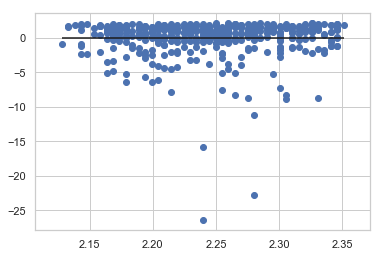

In [12]:
predictions = model.predict(X_linear)
# Plot Residuals
plt.scatter(predictions, predictions - y_linear)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

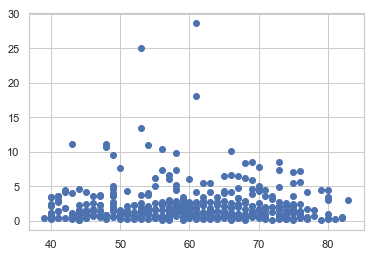

In [13]:
plt.scatter(X_linear, y_linear)

In [14]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.00506599]]
y-axis intercept:  [2.54851357]


In [15]:
x_min = np.array([[X_linear.min()]])
x_max = np.array([[X_linear.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[39]]
Max X Value: [[83]]


In [18]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

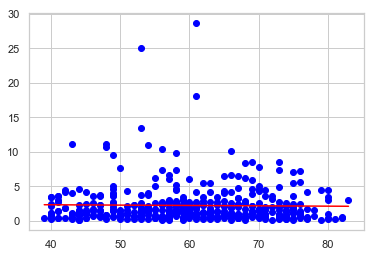

In [19]:
plt.scatter(X_linear, y_linear, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')